# Machine Learning - Classification

In [1]:
# Importing packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

## 1. Define (business) goal
Goal: Build a machine learning model that is able to predict whether a passengers of the Titatanic would survive or not.

## 2. Get Data

In [2]:
df = pd.read_csv('../data/train.csv')
df.shape

(891, 12)

## 3. Train-test split 

In [3]:
y = df["Survived"]
X = df.drop("Survived", axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 11) (179, 11) (712,) (179,)


## 4. Explore the data

In [5]:
# Re-combine X and y of training set in one dataframe for data exploration
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)
print(df_train.shape)
print(df_train.head())

(712, 12)
     PassengerId  Pclass                                Name     Sex   Age  \
331          332       1                 Partner, Mr. Austen    male  45.5   
733          734       2          Berriman, Mr. William John    male  23.0   
382          383       3                  Tikkanen, Mr. Juho    male  32.0   
704          705       3             Hansen, Mr. Henrik Juul    male  26.0   
813          814       3  Andersson, Miss. Ebba Iris Alfrida  female   6.0   

     SibSp  Parch             Ticket     Fare Cabin Embarked  Survived  
331      0      0             113043  28.5000  C124        S         0  
733      0      0              28425  13.0000   NaN        S         0  
382      0      0  STON/O 2. 3101293   7.9250   NaN        S         0  
704      1      0             350025   7.8542   NaN        S         0  
813      4      2             347082  31.2750   NaN        S         0  


### Total surviving vs. non-surviving passengers
About one-third more passengers drowned than survived.

Text(0, 0.5, 'Number of passengers')

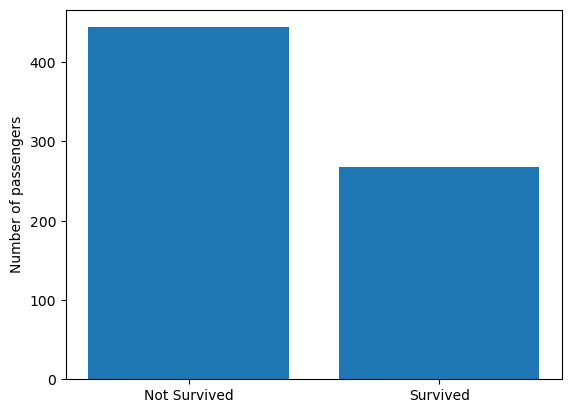

In [6]:
survived = df_train.groupby('Survived')['PassengerId'].count()
plt.bar(x=["Not Survived", "Survived"], height=survived)
plt.xlabel("")
plt.ylabel('Number of passengers')

### Rate of surviving passengers per class
Survivial rate decreased from 1st to 2nd to 3rd class. A good correlation with the number of passangers that survived/drowned can be expected.

In [8]:
for pclass in range(1,4):
    survived = df_train[(df_train['Survived'] == 1) & (df_train["Pclass"] == pclass)]["PassengerId"].count()
    total_passengers_in_class = df_train[df_train['Pclass'] == pclass]["PassengerId"].count()
    print("Rate of surviving passengers in " + str(pclass) + ". class: ", round(survived/total_passengers_in_class, 2))

Rate of surviving passengers in 1. class:  0.61
Rate of surviving passengers in 2. class:  0.48
Rate of surviving passengers in 3. class:  0.24


### Explore number of male/female passengers per class 1st/2nd/3rd

The number of male passengers in the 3rd class was significantly higher than the number of women in this class as well as the number of male and female passengers in the 1st and 2nd class. 

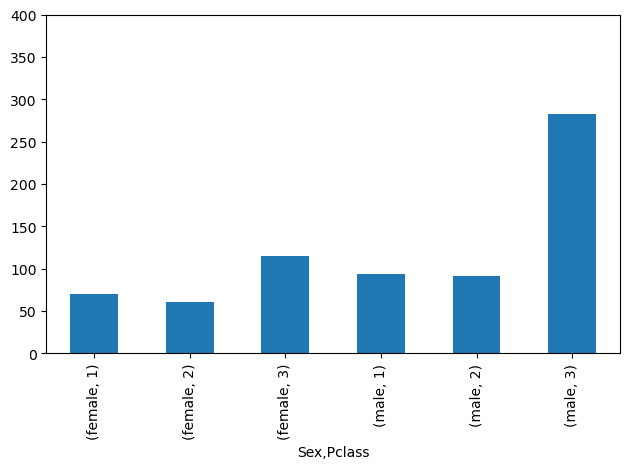

In [9]:
df_subset = df_train[['PassengerId',"Pclass","Sex"]]
df_subset = df_subset.groupby(["Sex","Pclass"]).count()
df_subset.plot.bar(legend = False)
plt.axis([None, None, 0, 400])
plt.tight_layout()

In [10]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
df_subset = df_train[["Survived", "Pclass", "PassengerId"]]
df_subset.groupby(['Survived', 'Pclass']).count()

PassengerId
Survived Pclass             
0        1                64
         2                78
         3               302
1        1                99
         2                73
         3                96

### Inspect surviving/non-surviving passengers per feature

Text(0, 0.5, 'Number of passengers')

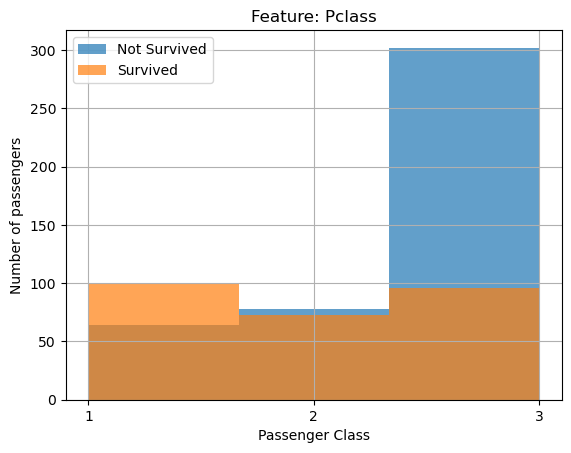

In [11]:
plt.close()
df_sub = df_train
df_sub["Pclass"] = df_sub["Pclass"].astype(str)
df_sub.groupby('Survived')['Pclass'].hist(alpha=0.7, bins=3, legend=True)
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

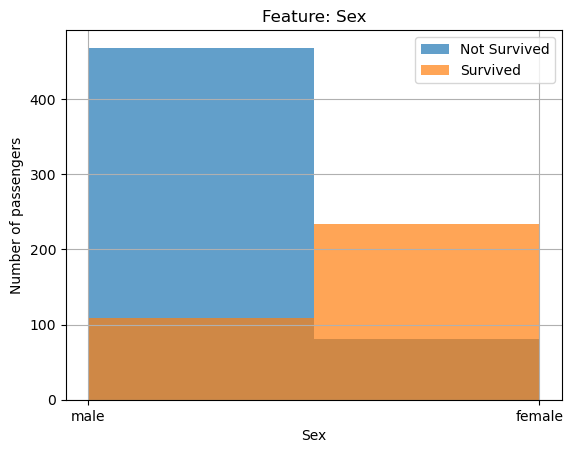

In [12]:
plt.close()
df.groupby('Survived')['Sex'].hist(alpha=0.7, bins= 2, legend=True)
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Sex")
plt.xlabel("Sex")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

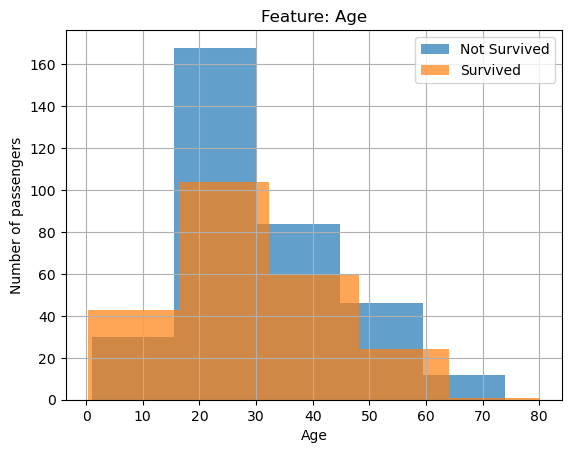

In [13]:
plt.close()
df_train.groupby('Survived')['Age'].hist(alpha=0.7, bins=5, legend=True)
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Age")
plt.xlabel("Age")
plt.ylabel("Number of passengers")

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64


Text(0, 0.5, 'Number of passengers')

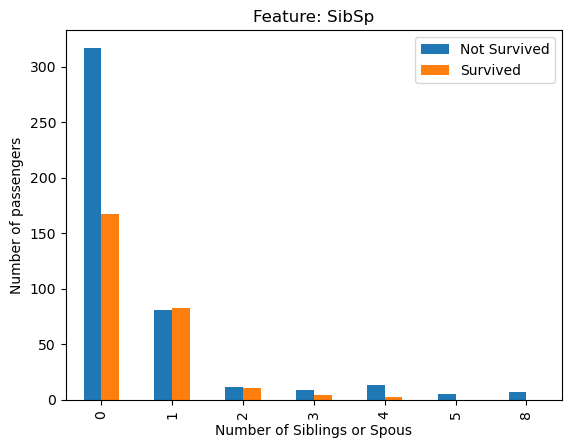

In [14]:
print(df.groupby(['SibSp','Survived'])['PassengerId'].count())
plt.close()
df_train.groupby(['SibSp','Survived']).count()['PassengerId'].unstack().plot(kind="bar")
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: SibSp")
plt.xlabel("Number of Siblings or Spous")
plt.ylabel("Number of passengers")

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64


Text(0, 0.5, 'Number of passengers')

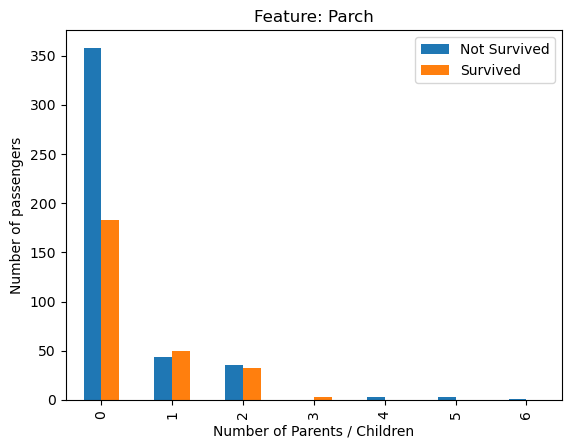

In [15]:
print(df.groupby(['Parch','Survived'])['PassengerId'].count())
plt.close()
df_train.groupby(['Parch','Survived']).count()['PassengerId'].unstack().plot(kind="bar")
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Parch")
plt.xlabel("Number of Parents / Children")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

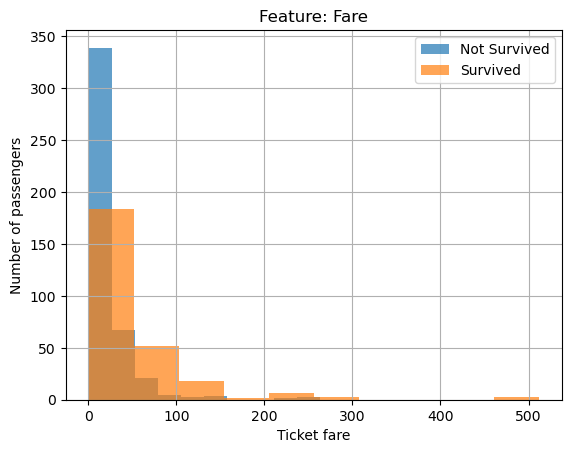

In [16]:
plt.close()
df_train.groupby('Survived')['Fare'].hist(alpha=0.7, bins=10, legend=True)
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Fare")
plt.xlabel("Ticket fare")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

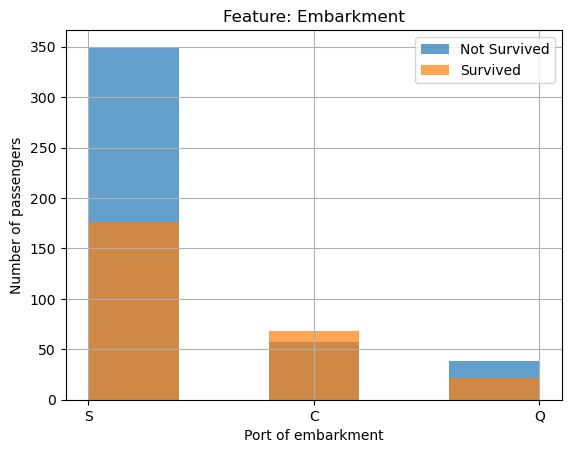

In [17]:
plt.close()
df_train.groupby('Survived')['Embarked'].hist(alpha=0.7, bins=5, legend=True)
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Embarkment")
plt.xlabel("Port of embarkment")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

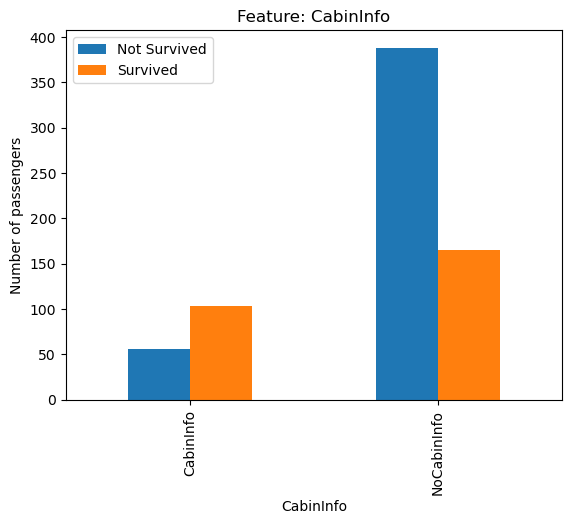

In [18]:
# Subdevide cabin data into CabinInfo and NoCabinInfo given
df_train.loc[df_train["Cabin"].isna(), "CabinInfo"] = "NoCabinInfo"
df_train.loc[df_train["Cabin"].notna(), "CabinInfo"] = "CabinInfo"
df_test.loc[df_test["Cabin"].isna(), "CabinInfo"] = "NoCabinInfo"
df_test.loc[df_test["Cabin"].notna(), "CabinInfo"] = "CabinInfo"
plt.close()
df_train.groupby(['CabinInfo','Survived']).count()['PassengerId'].unstack().plot(kind="bar")
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: CabinInfo")
plt.ylabel("Number of passengers")

['Mr.' 'Miss.' 'NoTitle' 'Mrs.' 'Master.']
['Master.' 'Mr.' 'Miss.' 'NoTitle' 'Mrs.']


Text(0, 0.5, 'Number of passengers')

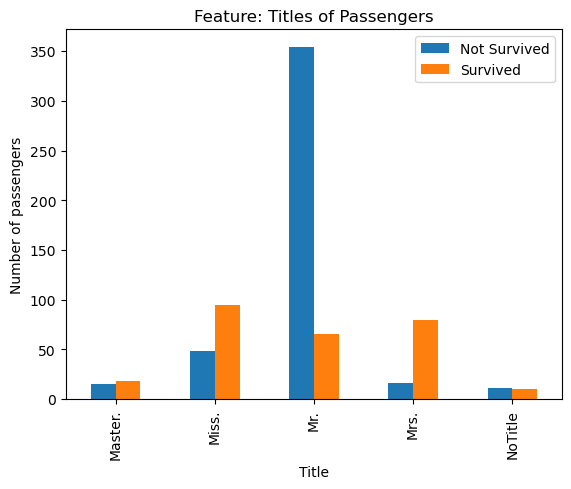

In [19]:
# Check titles in names
for i, row in df_train.iterrows():
    df_train.loc[i, "Title"] = row["Name"].split(", ")[1].split(" ")[0]
for i, row in df_test.iterrows():   
    df_test.loc[i, "Title"] = row["Name"].split(", ")[1].split(" ")[0]
# Set all NaNs and either unmeaningful or unsignificant to "NoTitle"
#print(df_train[df_train["Title"].isna()]["PassengerId"].count())

for title in ["the", "Mlle.", "Mme.", "Ms.", "Major.", "Lady.", "Capt.", "Col.", "Dr.", "Rev.", "Don", "Jonkheer", "Sir"]:
    for i, row in df_train.iterrows():
        sub_str = df_train.loc[i, "Title"].strip()
        if title in sub_str:
            df_train.loc[i, "Title"] = "NoTitle"

for title in ["the", "Mlle.", "Mme.", "Ms.", "Major.", "Lady.", "Capt.", "Col.", "Dr.", "Rev.", "Don", "Jonkheer", "Sir"]:
    for i, row in df_test.iterrows():
        sub_str = df_test.loc[i, "Title"].strip()
        if title in sub_str:
            df_test.loc[i, "Title"] = "NoTitle"

print(df_train["Title"].unique())
print(df_test["Title"].unique())

plt.close()
df_train.groupby(['Title','Survived']).count()['PassengerId'].unstack().plot(kind="bar")
plt.legend(labels=["Not Survived", "Survived"])
plt.title("Feature: Titles of Passengers")
plt.ylabel("Number of passengers")


## 5. Feature engineering

### Inspect Features (columns) of Titanic data set and plan enginnering / transformation

There exist 12 columns in the data set:

Nothing to do for the columns:
- 'Target' : "Survived" -> Contains data in the form 0==Drowned and 1==Survived -> Nothing to do
- 'PassengerId' : Contains the IDs of the passengers as integer values. It can be excluded (or is extremely unlikely) that the ID has an influence on the survival of the passengers.
- 'Ticket' : Ticket number / Ticket ID. It is extremely unlikely that there is a dependency between the ticket ID and the survival. Thus, this will not be considered for model building for now.

Columns to engineer / transform / consider in model creation:
- 'Pclass': Class booked as integer values -> although discrete values, should be treated as numerical column, since the class numer can have a direct realation to the survival, e.g. if first class passengers were granted priority over second class passengers and these over third class passengers for evacuation.
- 'Sex': Categorical column with two possible values male or female -> Should be transformed with One-Hot-Encoding to individual male / female columns with 0 / 1 values
- 'Age': Passenger age as real numbers with one decimal digit. Numerical column / "Metric" data. -> Scale, Optional: Bin the data. As we have seen in the data exploration that binning the data into five age groups shows a clear difference of the survival expectation, 5 bins should be created for Age in this case.
- 'SibSp' : Number of siblings / spouses aboard the Titanic. The column contains integer values: 0==No siblings / spouses aboard or 1,2,3,4,5 and 8==Number of Siblings aboard. -> Could be considered as numerical and as categorical values. For now considering it as numerical values as there might be a direct relation between the number of siblings aboard and the survival rate. When conisdered as categorical data the exploratory analysis indicated that it might be a good choice to use three categories ("No SibSp", "1to4_SibSp", "5orMore_SibSp")
- 'Parch' : Number of parents / children aboard the titanic. Integer values: 0-6. Could be considered as numerical and as categorical. Might also be not considered at all, since the information is partially contained in SibSp -> Redundant information? For now will be considered as numerical column. If categories are created later, then categorization according to "NoParch", "1_3_Parches", "4orMore_Parches" might be a good option to check.
- 'Fare' : Passenger Fare, i.e. price of ticket. Numerical column / "Metric" data. -> To be scaled? So that the smallest fare is zero?
- 'Embarked' : Port of Embarkation, Categorical data, S', 'C', 'Q'; C = Cherbourg, Q = Queenstown, S = Southampton
- 'Cabin' : ID / Name of the Cabin. -> Whether there is a cabin name or not is related to the survival rate.
- 'Name' : Name of the passenger as String. Contains titles of passangers that can be used for modeling.

In [24]:
# Inspect column headers
print(df.columns)

# Nothing to do for
df[['Survived', 'Name', 'PassengerId']]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Name,PassengerId
0,0,"Braund, Mr. Owen Harris",1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,1,"Heikkinen, Miss. Laina",3
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4
4,0,"Allen, Mr. William Henry",5
...,...,...,...
886,0,"Montvila, Rev. Juozas",887
887,1,"Graham, Miss. Margaret Edith",888
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",889
889,1,"Behr, Mr. Karl Howell",890


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
# Columns to consider for model generation
# Categorical columns
print("Categorical columns")
print(df[['Sex','Embarked']].head())
print("Numerical columns")
print(df[['Age', 'Fare']].head())
print("Can be considered as numerical and as categorical columns. Numerical for now.")
print(df[['Pclass', 'SibSp', 'Parch']].head())

Categorical columns
      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S
Numerical columns
    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
Can be considered as numerical and as categorical columns. Numerical for now.
   Pclass  SibSp  Parch
0       3      1      0
1       1      1      0
2       3      0      0
3       1      1      0
4       3      0      0


In [27]:
print("Number of NaN entries in training set:")
for col in X_train.columns:
    print(str(col), X_train[col].isna().sum())

print("Fare is zero:", X_train[X_train["Fare"]==0]["Fare"].count())
print("Is a fare of zero due to missing values or because the passengers have traveled free of charge?")

Number of NaN entries in training set:
PassengerId 0
Pclass 0
Name 0
Sex 0
Age 140
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 553
Embarked 2
Fare is zero: 13
Is a fare of zero due to missing values or because the passengers have traveled free of charge?


### Handle missing age data

### Impute missing age values
First impute the missing age values, since it would be best to replace them not by the overall median, but by the mean / median of the Survived and Not Survived subsets in order to consider them in the evaluation.

In [28]:
mean_age_drowned = round(df.groupby('Survived')["Age"].mean()[0], 1)
mean_age_survived = round(df.groupby('Survived')["Age"].mean()[1], 1)
print("Average age of drowned passangers:", mean_age_drowned)
print("Average age of survived passengers:", mean_age_survived)

Average age of drowned passangers: 30.6
Average age of survived passengers: 28.3


In [29]:
median_age_drowned = round(df.groupby('Survived')["Age"].mean()[0], 1)
median_age_survived = round(df.groupby('Survived')["Age"].mean()[1], 1)
print("Average age of drowned passangers:", median_age_drowned)
print("Average age of survived passengers:", median_age_survived)

Average age of drowned passangers: 30.6
Average age of survived passengers: 28.3


In [30]:
# Replace with separate mean values
# Note: Only worked with loc
df_train.loc[df_train["Survived"]==0, "Age"] = df_train[df_train["Survived"]==0]["Age"].fillna(mean_age_drowned)
df_train.loc[df_train["Survived"]==1, "Age"] = df_train[df_train["Survived"]==1]["Age"].fillna(mean_age_survived)
df_test.loc[df_test["Survived"]==0, "Age"] = df_test[df_test["Survived"]==0]["Age"].fillna(mean_age_drowned)
df_test.loc[df_test["Survived"]==1, "Age"] = df_test[df_test["Survived"]==1]["Age"].fillna(mean_age_survived)

In [31]:
# Check if it worked
print("Number of NaN values for the feature 'Age' in training set:", df_train["Age"].isna().sum())
print("Number of NaN values for the feature 'Age' in test set:", df_test["Age"].isna().sum())

Number of NaN values for the feature 'Age' in training set: 0
Number of NaN values for the feature 'Age' in test set: 0


In [32]:
X_train = df_train.drop("Survived", axis=1)
X_test = df_test.drop("Survived", axis=1)

In [33]:
# Check that there are now no missing values in feature columns of X_train and X_test
for col in X_train.columns:
    print(str(col), X_train[col].isna().sum())
for col in X_test.columns:
    print(str(col), X_test[col].isna().sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 553
Embarked 2
CabinInfo 0
Title 0
PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 134
Embarked 0
CabinInfo 0
Title 0


### Apply standard feature engineering procedures using pipeline

In [34]:
# Define proceeding for numerical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [35]:
num_pipe = make_pipeline(
    MinMaxScaler()
)

In [36]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinInfo,Title
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,CabinInfo,Mr.
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,NoCabinInfo,Mr.
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,NoCabinInfo,Mr.
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,NoCabinInfo,Mr.
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,NoCabinInfo,Miss.


In [37]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinInfo,Title
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.3,1,1,2661,15.2458,NaN,C,NoCabinInfo,Master.
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,NoCabinInfo,Mr.
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,NoCabinInfo,Mr.
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,NoCabinInfo,Miss.
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,NoCabinInfo,Miss.


In [38]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['PassengerId']),
    ('cat_preprocessing', cat_pipe, ['Sex', 'Embarked']),
    ('num_preprocessing', num_pipe, ['Pclass'])
])

In [39]:
X_train_m4 = feature_transform.fit_transform(X_train)
X_test_m4 = feature_transform.transform(X_test)
print(X_train.shape)
print(X_train_m4.shape)
print(X_test_m4.shape)
# 'PassengerId', 'Pclass'
# 2 x Sex
# 3 x Embarked

(712, 13)
(712, 7)
(179, 7)


### Feature engineering for Siblings and Spous - For Model 5

Creating three categories: "No SibSp", "1to4_SibSp", "5orMore_SibSp"

In [40]:
conditions_train = [
    (X_train['SibSp'] == 0),
    (X_train['SibSp'] >= 1) & (X_train['SibSp'] <= 4),
    (X_train['SibSp'] >= 5)
    ]

conditions_test = [
    (X_test['SibSp'] == 0),
    (X_test['SibSp'] >= 1) & (X_test['SibSp'] <= 3),
    (X_test['SibSp'] >= 4)
    ]

# List of values to be assigned
values = ['No SibSp', '1to3_SibSp', '4orMore_SibSp']

# Create a new column
X_train['SibSpCat'] = np.select(conditions_train, values)
X_test['SibSpCat'] = np.select(conditions_test, values)


In [41]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['PassengerId', 'Age']),
    ('cat_preprocessing', cat_pipe, ['Sex', 'Embarked', 'SibSpCat', 'CabinInfo']),
    ('num_preprocessing', num_pipe, ['Pclass'])
])

In [42]:
X_train_m5 = feature_transform.fit_transform(X_train)
X_test_m5 = feature_transform.transform(X_test)
print(X_train.shape)
print(X_train_m5.shape)
print(X_test_m5.shape)

(712, 14)
(712, 13)
(179, 13)


In [43]:
# Feature engineering for random forest mode - Model 9
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['PassengerId', 'Pclass', 'Age']),
    ('cat_preprocessing', cat_pipe, ['Sex', 'Embarked', 'SibSpCat']),
])

In [44]:
X_train_m10 = feature_transform.fit_transform(X_train)
X_test_m10 = feature_transform.transform(X_test)
print(X_train_m10.shape)
print(X_test_m10.shape)

(712, 11)
(179, 11)


### Binning Age into 'young', 'middle-aged', and 'old'

In [45]:
age_pipe = make_pipeline(
    MinMaxScaler(),
    KBinsDiscretizer(n_bins=3, strategy='quantile', encode='onehot-dense')
)

In [46]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['PassengerId']),
    ('cat_preprocessing', cat_pipe, ['Sex', 'Embarked', 'SibSpCat']),
    ('num_preprocessing', num_pipe, ['Pclass']),
    ('age_preprocessing', age_pipe, ['Age'])
])

In [47]:
X_train_m7 = feature_transform.fit_transform(X_train)
X_test_m7 = feature_transform.transform(X_test)
print(X_train_m7.shape)
print(X_test_m7.shape)

(712, 13)
(179, 13)


### Include CabinInfo and Title 

In [48]:
feature_transform = ColumnTransformer([
    ('do_nothing', 'passthrough', ['PassengerId']),
    ('cat_preprocessing', cat_pipe, ['Sex', 'Embarked', 'CabinInfo', 'Title']),
    ('num_preprocessing', num_pipe, ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch'])
])

In [49]:
X_train_m8 = feature_transform.fit_transform(X_train)
X_test_m8 = feature_transform.transform(X_test)
print(X_train_m8.shape)
print(X_test_m8.shape)

(712, 18)
(179, 18)


## 6. Model Generation

In [50]:
y_train_dummy = df_train["Survived"]
X_train_dummy = df_train.drop("Survived", axis = 1)
y_test_dummy = df_test["Survived"]
X_test_dummy = df_test.drop("Survived", axis = 1)

### Dummy Classifiers

#### Model 1: Dummy Classifier using the strategy 'most_frequent'

In [51]:
# Traning the model
m1 = DummyClassifier(strategy='most_frequent')
m1.fit(X_train_dummy, y_train_dummy)
# Model evaluation
print("Accuracy of model 1 for training set:", round(m1.score(X_train_dummy, y_train),2))
print("Accuracy of model 1 for test set:", round(m1.score(X_test_dummy, y_test),3))

Accuracy of model 1 for training set: 0.62
Accuracy of model 1 for test set: 0.587


#### Model 2: Dummy Classifier using the strategy 'stratified'

In [52]:
# Traning the model
m2 = DummyClassifier(strategy='stratified')
m2.fit(X_train_dummy, y_train_dummy)
# Model evaluation
print("Accuracy of model 2 for training set:", round(m2.score(X_train_dummy, y_train),2))
print("Accuracy of model 2 for test set:", round(m2.score(X_test_dummy, y_test),3))

Accuracy of model 2 for training set: 0.49
Accuracy of model 2 for test set: 0.486


### Logistric regression models

#### Model 3:  No feature engineering and using only 'Pclass' as feature

In [53]:
# Create subset of train and test set containing only "Pclass" as feature
X_train_m3 = X_train[["Pclass"]]
X_test_m3 = X_test[["Pclass"]]
# Create the model
m3 = LogisticRegression()
m3.fit(X_train_m3, y_train)
# Print the coefficient and intercept values of the model
print("Coefficient and Intercept: "f'w1: {m3.coef_} and w0: {m3.intercept_}')
# Calculate the accuracy
print("Accuracy of model 3 for training set:", round(m3.score(X_train_m3, y_train),2))
print("Accuracy of model 3 for test set:", round(m3.score(X_test_m3, y_test),3))

Coefficient and Intercept: w1: [[-0.80800402]] and w0: [1.33719422]
Accuracy of model 3 for training set: 0.67
Accuracy of model 3 for test set: 0.704


#### Model 4 : Applying feature engineering
Categorical columns (one-hot encoded): Sex, Embarked

Numerical columns (scaled): Pclass

In [54]:
# Create the model
m4 = LogisticRegression(max_iter=500)
m4.fit(X_train_m4, y_train)
# Print the coefficient and intercept values of the model
# Calculate the accuracy
print("Accuracy of model 4 for training set:", round(m4.score(X_train_m4, y_train),2))
print("Accuracy of model 4 for test set:", round(m4.score(X_test_m4, y_test),3))

Accuracy of model 4 for training set: 0.79
Accuracy of model 4 for test set: 0.782


#### Model 5 : SibSp considered as three categories
Categorical columns (one-hot encoded): Sex, Embarked, SibSpCat

Numerical columns (scaled): Pclass

In [55]:
# Create the model
m5 = LogisticRegression(max_iter=500)
m5.fit(X_train_m5, y_train)

# Calculate the accuracy
print("Accuracy of model 5 for training set:", round(m5.score(X_train_m5, y_train),2))
print("Accuracy of model 5 for test set:", round(m5.score(X_test_m5, y_test),3))

Accuracy of model 5 for training set: 0.8
Accuracy of model 5 for test set: 0.81


#### Model 6: With class_weight='balanced'
With option class_weight='balanced' to even out the bias caused by the non-survivors outnumbering the survivors.

In [56]:
X_train_m6 = X_train_m5
X_test_m6 = X_test_m5

# Create the model
m6 = LogisticRegression(max_iter=500, class_weight='balanced')
m6.fit(X_train_m6, y_train)

# Calculate the accuracy
print("Accuracy of model 6 for training set:", round(m6.score(X_train_m6, y_train),3))
print("Accuracy of model 6 for test set:", round(m6.score(X_test_m6, y_test),3))
# No real improvement in accuracy seen

Accuracy of model 6 for training set: 0.785
Accuracy of model 6 for test set: 0.799


#### Model 7: With 'Age' categories young, middle-age, and old

In [57]:
# Create the model
m7 = LogisticRegression(max_iter=500)
m7.fit(X_train_m7, y_train)

# Calculate the accuracy
print("Accuracy of model 7 for training set:", round(m7.score(X_train_m7, y_train),3))
print("Accuracy of model 7 for test set:", round(m7.score(X_test_m7, y_test),3))
# No improvement compared to model 5

Accuracy of model 7 for training set: 0.795
Accuracy of model 7 for test set: 0.788


#### Model 8: Considering all features

In [58]:
# Create the model
m8 = LogisticRegression(max_iter=500)
m8.fit(X_train_m8, y_train)

# Calculate the accuracy
print("Accuracy of model 8 for training set:", round(m8.score(X_train_m8, y_train),3))
print("Accuracy of model 8 for test set:", round(m8.score(X_test_m8, y_test),3))

Accuracy of model 8 for training set: 0.837
Accuracy of model 8 for test set: 0.816


### Random forest models

####  Model 9 : Basic random forest model
Random forest model considering 'Pclass', 'Age', 'SibSp'

In [59]:
# Initialize the RandomForestClassifier
m9 = RandomForestClassifier(n_estimators=3000, max_depth=7)

In [60]:
# Create training and test datasets
X_train_m9 = X_train[["Pclass", "Age", "SibSp"]]
X_test_m9 = X_test[["Pclass", "Age", "SibSp"]]

In [61]:
# Fit the training data
m9.fit(X_train_m9, y_train)
print("Accuracy of random forest model for training set:", round(m9.score(X_train_m9, y_train), 3))
print("Accuracy of random forest model for test set:", round(m9.score(X_test_m9, y_test), 3))

Accuracy of random forest model for training set: 0.816
Accuracy of random forest model for test set: 0.81


#### Model 10: Random forest model considering one-hot encoded 'Sex' and 'Embarked', as well as categorized Siblings and Spous
Random forest model considering 'Pclass', 'Age', 'SibSpCat'

In [62]:
m10 = RandomForestClassifier(n_estimators=100, max_depth=3)

In [63]:
# Fit the training data
m10.fit(X_train_m10, y_train)
print("Accuracy of random forest model for training set:", round(m10.score(X_train_m10, y_train), 3))
print("Accuracy of random forest model for test set:", round(m10.score(X_test_m10, y_test), 3))

Accuracy of random forest model for training set: 0.808
Accuracy of random forest model for test set: 0.782


#### Model 11: As Model 9, but with age groups 'young', 'middle-age', and 'old'

In [64]:
m11 = RandomForestClassifier(n_estimators=500, max_depth=5)

In [65]:
X_train_m11 = X_train_m7
X_test_m11 = X_test_m7

# Fit the training data
m11.fit(X_train_m11, y_train)
print("Accuracy of random forest model for training set:", round(m11.score(X_train_m11, y_train), 3))
print("Accuracy of random forest model for test set:", round(m11.score(X_test_m11, y_test), 3))
# Less computationally expensive, but accuracy not as good as for Model 9

Accuracy of random forest model for training set: 0.823
Accuracy of random forest model for test set: 0.793


#### Model 12: Random Forest model considering all features

In [66]:
m12 = RandomForestClassifier(n_estimators=500, max_depth=5)

In [67]:
# Fit the training data
X_train_m12 = X_train_m8
X_test_m12 = X_test_m8
m12.fit(X_train_m12, y_train)
print("Accuracy of random forest model for training set:", round(m12.score(X_train_m12, y_train), 3))
print("Accuracy of random forest model for test set:", round(m12.score(X_test_m12, y_test), 3))

Accuracy of random forest model for training set: 0.871
Accuracy of random forest model for test set: 0.844


## 7. Evaluation

For accuracy calculations for the individual models see section 6 above.

## 8. Predict

### Model 3

In [68]:
# Perform prediction
y_pred_m3 = m3.predict(X_test_m3)
# Determine quality
print("Accuracy:", round(accuracy_score(y_test, y_pred_m3),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m3), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m3), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m3), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m3), 3))

Accuracy: 0.704
Precision: 0.698
Recall: 0.5
F1-Score: 0.583
AUC score: 0.674


In [288]:
# Calculate probabilities for test set
y_pred_probabilities = m3.predict_proba(X_test_m3)

In [289]:
# Check effect of changing threshold to 0.9 according to 2.2.4
y_pred_for_p0_9 = []
for i in y_pred_probabilities[:,1]:
    if i < 0.9:
        y_pred_for_p0_9.append(0)
    else:
        y_pred_for_p0_9.append(1)
# Only 0 predicted
print("Accuracy for threshold p=0.9:", round(accuracy_score(y_test, y_pred_for_p0_9),3))

Accuracy for threshold p=0.9: 0.587


In [290]:
# Check effect of changing threshold to 0.1 according to 2.2.4
y_pred_for_p0_1 = []
for i in y_pred_probabilities[:,1]:
    if i < 0.1:
        y_pred_for_p0_1.append(0)
    else:
        y_pred_for_p0_1.append(1)

print("Accuracy for threshold p=0.9:", round(accuracy_score(y_test, y_pred_for_p0_1),3))

Accuracy for threshold p=0.9: 0.413


### Model 4

In [69]:
# Perform prediction
y_pred_m4 = m4.predict(X_test_m4)
# Determine accuracy
print("Accuracy for Model 4:", round(accuracy_score(y_test, y_pred_m4),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m4), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m4), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m4), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m4), 3))

Accuracy for Model 4: 0.782
Precision: 0.733
Recall: 0.743
F1-Score: 0.738
AUC score: 0.776


### Model 5

In [70]:
# Perform prediction
y_pred_m5 = m5.predict(X_test_m5)
# Determine accuracy
print("Accuracy for Model 5:", round(accuracy_score(y_test, y_pred_m5),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m5), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m5), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m5), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m5), 3))

Accuracy for Model 5: 0.81
Precision: 0.786
Recall: 0.743
F1-Score: 0.764
AUC score: 0.8


### Model 6

In [71]:
# Perform prediction
y_pred_m6 = m6.predict(X_test_m6)
# Determine accuracy
print("Accuracy for Model 6:", round(accuracy_score(y_test, y_pred_m6),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m6), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m6), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m6), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m6), 3))

Accuracy for Model 6: 0.799
Precision: 0.732
Recall: 0.811
F1-Score: 0.769
AUC score: 0.801


### Model 7

In [72]:
# Perform prediction
y_pred_m7 = m7.predict(X_test_m7)
# Determine accuracy
print("Accuracy for Model 7:", round(accuracy_score(y_test, y_pred_m7),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m7), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m7), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m7), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m7), 3))

Accuracy for Model 7: 0.788
Precision: 0.737
Recall: 0.757
F1-Score: 0.747
AUC score: 0.783


### Model 8

In [73]:
# Perform prediction
y_pred_m8 = m8.predict(X_test_m8)
# Determine accuracy
print("Accuracy for Model 9:", round(accuracy_score(y_test, y_pred_m8),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m8), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m8), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m8), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m8), 3))

Accuracy for Model 9: 0.816
Precision: 0.781
Recall: 0.77
F1-Score: 0.776
AUC score: 0.809


### Model 9

In [74]:
# Perform prediction
y_pred_m9 = m9.predict(X_test_m9)
# Determine accuracy
print("Accuracy for Model 9:", round(accuracy_score(y_test, y_pred_m9),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m9), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m9), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m9), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m9), 3))

Accuracy for Model 9: 0.81
Precision: 0.812
Recall: 0.703
F1-Score: 0.754
AUC score: 0.794


### Model 10

In [75]:
# Perform prediction
y_pred_m10 = m10.predict(X_test_m10)
# Determine accuracy
print("Accuracy for Model 10:", round(accuracy_score(y_test, y_pred_m10),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m10), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m10), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m10), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m10), 3))

Accuracy for Model 10: 0.782
Precision: 0.778
Recall: 0.662
F1-Score: 0.715
AUC score: 0.764


### Model 11

In [76]:
# Perform prediction
y_pred_m11 = m11.predict(X_test_m11)
# Determine accuracy
print("Accuracy for Model 10:", round(accuracy_score(y_test, y_pred_m11),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m11), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m11), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m11), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m11), 3))

Accuracy for Model 10: 0.793
Precision: 0.794
Recall: 0.676
F1-Score: 0.73
AUC score: 0.776


### Model 12

In [77]:
# Perform prediction
y_pred_m12 = m12.predict(X_test_m12)
# Determine accuracy
print("Accuracy for Model 12:", round(accuracy_score(y_test, y_pred_m12),3))
print("Precision:", round(precision_score(y_true=y_test, y_pred=y_pred_m12), 3))
print("Recall:", round(recall_score(y_true=y_test, y_pred=y_pred_m12), 3))
print("F1-Score:", round(f1_score(y_true=y_test, y_pred=y_pred_m12), 3))
print("AUC score:", round(roc_auc_score(y_true=y_test, y_score=y_pred_m12), 3))

Accuracy for Model 12: 0.844
Precision: 0.848
Recall: 0.757
F1-Score: 0.8
AUC score: 0.831
